In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
#%load_ext cudf.pandas    # pandas DF를 CuDF로 변환한다.

In [6]:
%%time

import pandas as pd
df = pd.read_csv("/gdrive/MyDrive/BigData/RAPID/price_paid_records.csv")


CPU times: user 27.8 s, sys: 4.93 s, total: 32.7 s
Wall time: 55.9 s


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


In [8]:
#  0   Transaction unique identifier: 거래 ID
#  1   Price                        : 거래 금액
#  2   Date of Transfer             : 거래 일자
#  3   Property Type                : 집 형태 Type D = 떨어져 있는 집, S = 반만 떨어져 있는 집, T = 붙어 있는 집, F = 주상복합, O = Other
#  4   Old/New                      : Y: 새집 / N: 헌집 구분
#  5   Duration                     : 기간 구분(F: 매매 / L: 리스)
#  6   Town/City                    : 타운/시티
#  7   District                     : 구역
#  8   County                       : 지역
#  9   PPDCategory Type             : A: 일반거래 / B: 권리양도
#  10  Record Status                : A = Addition, C = Change, D = Delete.
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [9]:
df['County'].unique() # 어떤 지역이 있는가?

array(['GREATER MANCHESTER', 'THURROCK', 'SOMERSET', 'BEDFORDSHIRE',
       'WEST YORKSHIRE', 'WILTSHIRE', 'OXFORDSHIRE', 'CORNWALL',
       'GREATER LONDON', 'MID GLAMORGAN', 'LANCASHIRE', 'DERBYSHIRE',
       'MERSEYSIDE', 'DEVON', 'HAMPSHIRE', 'SOUTH YORKSHIRE',
       'MIDDLESBROUGH', 'THAMESDOWN', 'LINCOLNSHIRE', 'HERTFORDSHIRE',
       'WEST MIDLANDS', 'NORFOLK', 'HUMBERSIDE', 'NORTHAMPTONSHIRE',
       'ISLE OF WIGHT', 'AVON', 'NOTTINGHAMSHIRE', 'CLEVELAND',
       'WEST GLAMORGAN', 'CHESHIRE', 'HARTLEPOOL', 'SURREY', 'ESSEX',
       'BUCKINGHAMSHIRE', 'TYNE AND WEAR', 'EAST SUSSEX', 'BLAENAU GWENT',
       'SOUTHAMPTON', 'NORTHUMBERLAND', 'WORCESTERSHIRE', 'WEST SUSSEX',
       'KENT', 'LEICESTERSHIRE', 'SUFFOLK', 'POOLE', 'MILTON KEYNES',
       'STOCKTON-ON-TEES', 'CUMBRIA', 'NORTH YORKSHIRE', 'SLOUGH',
       'BRACKNELL FOREST', 'SOUTH GLAMORGAN', 'STAFFORDSHIRE', 'CLWYD',
       'SOUTHEND-ON-SEA', 'WARWICKSHIRE', 'WARRINGTON', 'SHROPSHIRE',
       'BERKSHIRE', 'HEREFORD AND

In [10]:
# 카운티 별로 가격 높은 순으로
counties = df[['County','Price']].groupby(['County'])
mean_prices = counties.mean()
df_price = mean_prices.sort_values('Price')
print(df_price[-5:]) # 끝에서 5개만 출력

                                Price
County                               
WEST BERKSHIRE          262618.536135
BUCKINGHAMSHIRE         277056.209873
SURREY                  305270.291335
GREATER LONDON          313809.618148
WINDSOR AND MAIDENHEAD  337424.948707


In [11]:
greater_london = df.loc[df['County'] == 'GREATER LONDON'] # GREATER LONDON 만 추려서 ...
print(f'{greater_london.shape[0]} residents')

2993422 residents


In [12]:
greater_london['Town/City'].unique()

array(['GREENFORD', 'ENFIELD', 'LONDON', 'ORPINGTON', 'ERITH', 'BROMLEY',
       'WOODFORD GREEN', 'UXBRIDGE', 'CARSHALTON', 'SOUTH CROYDON',
       'HORNCHURCH', 'BARKING', 'MITCHAM', 'WORCESTER PARK', 'SIDCUP',
       'BARNET', 'TEDDINGTON', 'RICHMOND', 'TWICKENHAM', 'SUTTON',
       'EDGWARE', 'MORDEN', 'CROYDON', 'WEMBLEY', 'HOUNSLOW',
       'NEW MALDEN', 'KINGSTON UPON THAMES', 'SURBITON', 'BEXLEYHEATH',
       'HARROW', 'ILFORD', 'CHESSINGTON', 'ROMFORD', 'RUISLIP', 'WELLING',
       'COULSDON', 'HAYES', 'SOUTHALL', 'FELTHAM', 'CHIGWELL',
       'THORNTON HEATH', 'UPMINSTER', 'RAINHAM', 'PURLEY', 'HAMPTON',
       'PINNER', 'BECKENHAM', 'KENLEY', 'NORTHOLT', 'STANMORE',
       'DAGENHAM', 'WEST DRAYTON', 'BEXLEY', 'CHISLEHURST', 'ISLEWORTH',
       'WEST WICKHAM', 'WALLINGTON', 'KESTON', 'NORTHWOOD', 'BELVEDERE',
       'BUCKHURST HILL', 'WESTERHAM', 'BRENTFORD', 'EAST MOLESEY',
       'WHYTELEAFE', 'DARTFORD', 'CATERHAM', 'BANSTEAD', 'SWANLEY',
       'EPSOM', 'WALTHAM CROSS', 

In [13]:
# 도시별로 가격평균과 건수 요약

town_groups = df[['Town/City', 'Price']].groupby('Town/City')
town_prices = town_groups['Price'].mean()
town_counts = town_groups['Price'].count()

towns = pd.DataFrame()
towns['mean_price'] = town_prices
towns['count'] = town_counts

towns = towns.sort_values('count', ascending=False)
towns.to_csv('/gdrive/MyDrive/BigData/RAPID/towns.csv')
towns.to_parquet('/gdrive/MyDrive/BigData/RAPID/towns.parquet')
towns.iloc[:3]

,mean_price,count
Town/City,,
LONDON,367955.188441,1784194
MANCHESTER,115333.803402,366133
BRISTOL,174213.722763,344839


In [14]:
towns = pd.read_parquet('/gdrive/MyDrive/BigData/RAPID/towns.parquet')
towns.iloc[:3]

,mean_price,count
Town/City,,
LONDON,367955.188441,1784194
MANCHESTER,115333.803402,366133
BRISTOL,174213.722763,344839


In [15]:
london_residents = greater_london.loc[greater_london['Town/City'].str.startswith('L')]
london_residents['Town/City'].unique()

array(['LONDON', 'LEATHERHEAD'], dtype=object)

In [16]:
london_residents = london_residents.loc[london_residents['Town/City'] == 'LONDON']
london_residents.shape[0]

1783765

In [17]:
london_residents['Price'].mean()

np.float64(367965.8471026172)

In [18]:
%%time
date= pd.to_datetime(df['Date of Transfer'])
df['year'] = date.dt.year
df['month'] = date.dt.month
df['date'] = date.dt.strftime('%Y%m')

CPU times: user 1min 4s, sys: 936 ms, total: 1min 5s
Wall time: 1min 4s


In [19]:
import sys # 메모리 관리를 위해 객체별 메모리 점유량 출력
for obj in dir():
    if obj[0] != '_':
        print(obj, sys.getsizeof(eval(obj)))

In 248
Out 352
counties 56
date 179914948
df 16627129364
df_price 9797
drive 72
exit 56
get_ipython 64
greater_london 2022798546
london_residents 1204441155
mean_prices 9797
pd 72
quit 56
sys 72
town_counts 86895
town_groups 56
town_prices 86895
towns 96255


In [20]:
del greater_london
del london_residents
del counties
del mean_prices
del df_price
del town_groups
del town_prices
del town_counts
del towns
del date


In [21]:
min_year = df['year'].min()  # Find the minimum year in the data

data_filtered = df[df['year'] >= min_year]
data_filtered = data_filtered[data_filtered['Town/City'] == 'LONDON']

avg_price_by_month = data_filtered.groupby("date")["Price"].mean()
cnt_tuid = data_filtered.groupby("date")["Transaction unique identifier"].count()

base_year = 2013  # Assuming data starts from min_year
base_month = 1

year_filtered = data_filtered[data_filtered['year'] == base_year]
year_filtered = year_filtered[year_filtered['month'] == base_month]

base_price = year_filtered['Price'].mean()
base_cnt = year_filtered["Transaction unique identifier"].count()

hpi = (avg_price_by_month / base_price) * 100
cnt1 = (cnt_tuid / base_cnt) * 100
hpi_df = pd.DataFrame({"yearmm": avg_price_by_month.index, "hpi": hpi.values, "cnt": cnt1.values})

hpi_df

,yearmm,hpi,cnt
0,199501,21.118132,103.959505
1,199502,19.335129,93.183352
2,199503,19.762977,127.941507
3,199504,20.049733,108.188976
4,199505,19.744366,122.969629
...,...,...,...
265,201702,158.437485,107.401575
266,201703,168.328280,123.464567
267,201704,188.920747,93.520810
268,201705,195.784288,86.479190


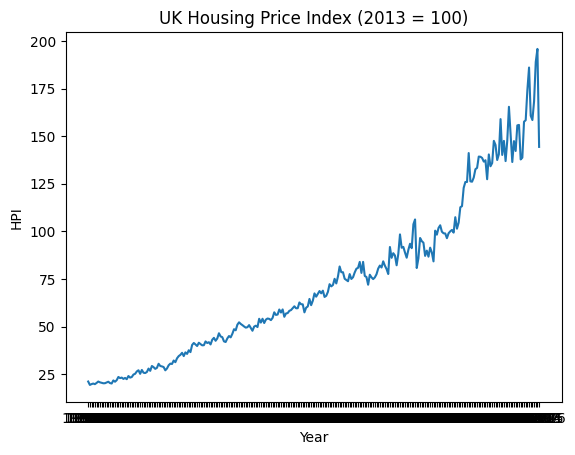

In [22]:
# Visualization Library
import matplotlib.pyplot as plt
%matplotlib inline

# HPI 그래프 생성
plt.plot(hpi_df["yearmm"], hpi_df["hpi"])
plt.xlabel("Year")
plt.ylabel("HPI")
plt.title("UK Housing Price Index (2013 = 100)")
plt.show()

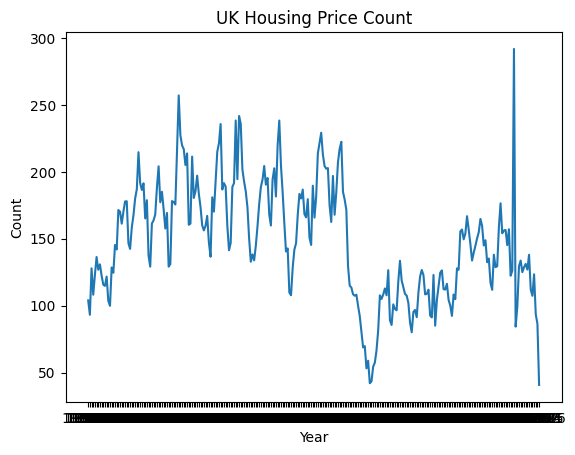

In [23]:
# 거래량 그래프 생성
plt.plot(hpi_df["yearmm"], hpi_df["cnt"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("UK Housing Price Count")
plt.show()